## Importing Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from empiricaldist import Pmf, Cdf

In [3]:
nsfg = pd.read_hdf('nsfg.hdf5', 'nsfg')

## Q1. In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.

In the 'nbrnaliv' column, replace the value 8, in place, with the special value NaNIn the 'nbrnaliv' column, replace the value 8, in place, with the special value NaN.

In [4]:
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [5]:
#code here
nsfg['nbrnaliv'].replace(8, np.nan, inplace = True)

Confirm that the value 8 no longer appears in this column by printing the values and their frequenciesConfirm that the value 8 no longer appears in this column by printing the values and their frequencies'''

In [6]:
#code here
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


## Q2. Compute a variable, For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75Compute a variable

In [7]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

### What is the pregnency length and summary statistics ??

In [8]:
# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


## Q3. Plot a histogram for the conceived age with 20 bins and label the axes accordingly.

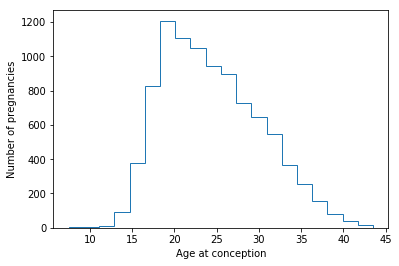

In [9]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

## Q4. Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks. Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.

In [10]:
def resample_rows_weighted(df, column='finalwgt', seed=17):
    """Resamples a DataFrame using probabilities proportional to given column.

    df: DataFrame
    column: string column name to use as weights

    returns: DataFrame
    """
    np.random.seed(seed)
    weights = df[column] / sum(df[column])
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

In [11]:
# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16# Resample the data

In [12]:
#Solution
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.392597951914515


## Q5. The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.

Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.

For comparison, select multiple, full-term babies and compute their mean birth weight.

In [13]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.40297320308299
Multiple full-term mean: 5.784722222222222


## Q6. Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable 'age' contains respondents' age in years.

In [14]:
gss = pd.read_hdf('gss.hdf5', 'gss')

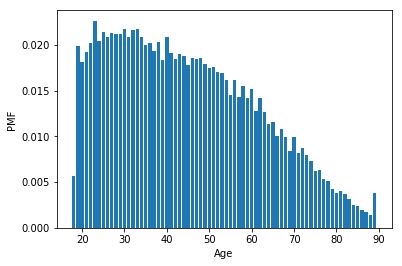

In [15]:
# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf.from_seq(age, normalize = True)

# Plot the PMF
pmf_age.bar(label='age')

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

## Q7. What percentage of the respondents in the GSS dataset are OLDER than 30?

In [16]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age(30))

#print the percentage of the represendents age older than 30 
print(100 - cdf_age(30))

27.0
73.0


## Q8. Compute the IQR value of the real income.

In [29]:
# Select the age column
income = gss['realinc']

# Compute the CDF of age
cdf_income = Cdf.from_seq(income)


In [30]:
# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

percentile_75th

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

percentile_25th

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

29676.0
